In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
ethereum = pd.read_csv('D:\\UA\\GitHub1\\REU\\csv files\\ETH.csv')

In [3]:
ethereum.shape

(366, 9)

In [4]:
ethereum.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1687046400,1747.15,1714.24,1727.25,61009.73,1.056030e+08,1720.51,direct,NaN
1,1687132800,1750.51,1702.53,1720.51,110080.68,1.898339e+08,1736.79,direct,NaN
2,1687219200,1796.20,1714.37,1736.79,204826.38,3.602025e+08,1792.70,direct,NaN
3,1687305600,1901.09,1787.65,1792.70,329097.67,6.080411e+08,1889.61,direct,NaN
4,1687392000,1932.43,1867.05,1889.61,226530.23,4.301376e+08,1872.42,direct,NaN


Text(0, 0.5, '$ Price')

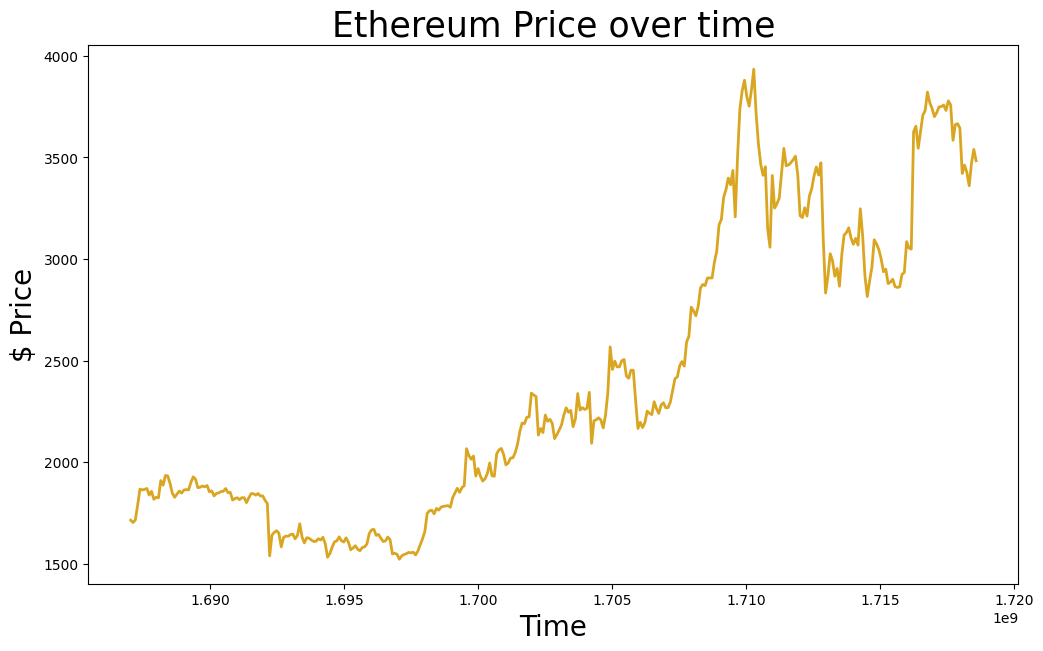

In [6]:
plt.figure(figsize = (12, 7))
plt.plot(ethereum["time"], ethereum["low"], color='goldenrod', lw=2)
plt.title("Ethereum Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

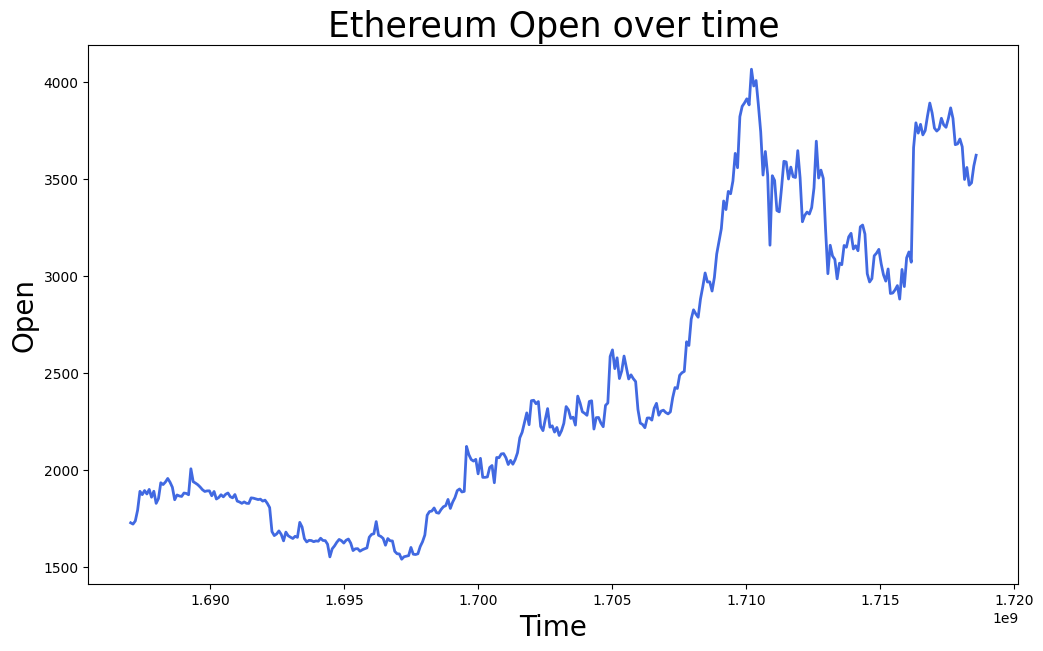

In [7]:
plt.figure(figsize = (12, 7))
plt.plot(ethereum["time"], ethereum["open"], color='royalblue', lw=2)
plt.title("Ethereum Open over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Open", size=20);

In [9]:
ethereum.isnull().sum()

time                  0
high                  0
low                   0
open                  0
volumefrom            0
volumeto              0
close                 0
conversionType        0
conversionSymbol    366
dtype: int64

In [10]:
ethereum['Dates'] = pd.to_datetime(ethereum['time'], unit='s')
ethereum.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,Dates
0,1687046400,1747.15,1714.24,1727.25,61009.73,1.056030e+08,1720.51,direct,NaN,2023-06-18
1,1687132800,1750.51,1702.53,1720.51,110080.68,1.898339e+08,1736.79,direct,NaN,2023-06-19
2,1687219200,1796.20,1714.37,1736.79,204826.38,3.602025e+08,1792.70,direct,NaN,2023-06-20
3,1687305600,1901.09,1787.65,1792.70,329097.67,6.080411e+08,1889.61,direct,NaN,2023-06-21
4,1687392000,1932.43,1867.05,1889.61,226530.23,4.301376e+08,1872.42,direct,NaN,2023-06-22


In [11]:
required_features = ['open', 'high', 'low', 'volumefrom', 'volumeto', 'close']
output_label = 'close'

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
ethereum[required_features],
ethereum[output_label],
test_size = 0.3
)

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
model.score(x_test, y_test)

1.0

In [15]:
future_set = ethereum.shift(periods=30).tail(30)

In [16]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

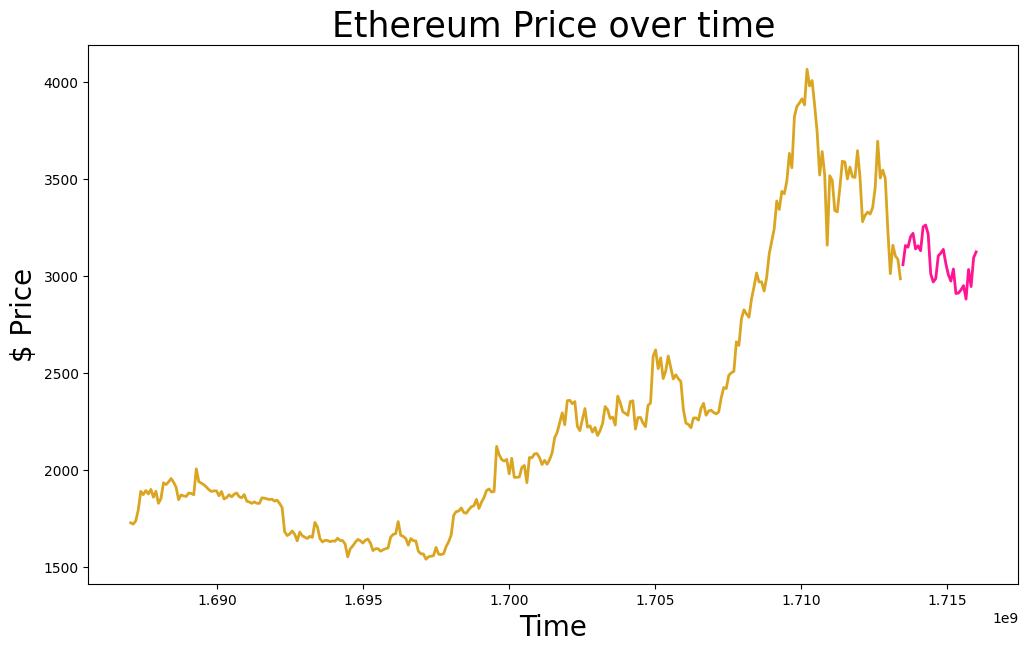

In [18]:
plt.figure(figsize = (12, 7))
plt.plot(ethereum["time"][-400:-60], ethereum["open"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["time"], prediction, color='deeppink', lw=2)
plt.title("Ethereum Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)